In [ ]:
# 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,023 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128215 files and di

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 사용 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/연구실용/"
path2 = "/content/drive/My Drive/연구실/"

In [ ]:
# 여기서부터는 안 돌려도 됨

In [ ]:
data = pd.read_csv(path2+"전처리최종이었음좋겠다.csv")

In [ ]:
X = data.drop(['한국표준산업분류코드10차(중분류)', '수익률 (1개월)(%)', 'macro_뉴스심리지수',
               'yearmonth', 'Ticker'], axis=1)
y = data['수익률 (1개월)(%)']
ym = data['yearmonth']
tk = data['Ticker']

In [ ]:
X.columns

Index(['베타 (D,1Yr)', 'PER(배)', 'PSR(배)', 'chmom', 'mom36m', 'zerotrade',
       'std_turn', 'mean_ill', 'retvol', 'maxret', 'var_market', 'mom1m',
       'mom12m', 'indmom', 'turn', 'mvel1', 'dolvol', 'betasq', 'Idiovol',
       'macro_(콜금리-기준금리)평균', 'macro_원/달러환율', 'macro_금($/OZ)', 'macro_KOSPI dp',
       'macro_KOSPI PER', 'macro_KOSPI PBR', 'macro_CD Rate',
       'macro_Term spread', 'macro_Default Spread', 'macro_VKOSPI 200'],
      dtype='object')

In [ ]:
X.shape

(312185, 29)

In [ ]:
X.iloc[:, :19].columns

Index(['베타 (D,1Yr)', 'PER(배)', 'PSR(배)', 'chmom', 'mom36m', 'zerotrade',
       'std_turn', 'mean_ill', 'retvol', 'maxret', 'var_market', 'mom1m',
       'mom12m', 'indmom', 'turn', 'mvel1', 'dolvol', 'betasq', 'Idiovol'],
      dtype='object')

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# R2oos

In [ ]:
# GBRT
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_gbrt = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"GBRT_bayesian_r2oos_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_gbrt.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [ ]:
# RF
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_rf = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"RF_bayesian_r2oos_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_rf.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [ ]:
# PLS
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pls = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PLS_r2oos_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_pls.append(np.apply_along_axis(my_func, 1, abs(shap_values[0])[:, :19]))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# PCR
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pcr = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PCR_r2oos_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_pcr.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
temp = pd.DataFrame({'PCR' : np.mean(np.mean(shap_pcr, axis=0), axis=0).tolist(),
                     'PLS' : np.mean(np.mean(shap_pls, axis=0), axis=0).tolist(),
                     'GBRT' : np.mean(np.mean(shap_gbrt, axis=0), axis=0).tolist(),
                     'RF' : np.mean(np.mean(shap_rf, axis=0), axis=0).tolist()}, index = X_train.columns[:19], dtype = float)
temp.head()

,PCR,PLS,GBRT,RF
"베타 (D,1Yr)",0.086869,0.024530,0.004052,0.010786
PER(배),0.088226,0.199090,0.512771,0.348423
PSR(배),0.050543,0.120582,0.077145,0.058363
chmom,0.016101,0.017537,0.000374,0.006864
mom36m,0.043912,0.013823,0.002400,0.014415


In [ ]:
np.sum(temp, axis=0)

PCR     1.0
PLS     1.0
GBRT    1.0
RF      1.0
dtype: float64

In [ ]:
temp.to_csv(path2+"micro_heatmap_r2oos.csv")

In [ ]:
# 여기부터 돌리면 됨

In [ ]:
temp = pd.read_csv(path2+"micro_heatmap_r2oos.csv", index_col=0)
temp.head()

,ENet,PCR,PLS,GBRT,RF,LGBM
"베타 (D,1Yr)",6.858045e-15,0.086869,0.024530,0.004052,0.010786,0.020474
PER(배),8.788710e-01,0.088226,0.199090,0.512771,0.348423,0.276835
PSR(배),2.921042e-02,0.050543,0.120582,0.077145,0.058363,0.052964
chmom,6.437075e-15,0.016101,0.017537,0.000374,0.006864,0.010780
mom36m,6.617857e-15,0.043912,0.013823,0.002400,0.014415,0.024507


In [ ]:
temp["ENet"] = pd.read_csv(path2+"GLM_r2oos_sharpley.csv").transpose().values[:19]/np.sum(pd.read_csv(path2+"GLM_r2oos_sharpley.csv").transpose().values[:19])
temp["LGBM"]= pd.read_csv(path2+"LGBM_r2oos_sharpley.csv").transpose().values[:19]/np.sum(pd.read_csv(path2+"LGBM_r2oos_sharpley.csv").transpose().values[:19])
temp.head()

,PCR,PLS,GBRT,RF,ENet,LGBM
"베타 (D,1Yr)",0.086869,0.024530,0.004052,0.010786,6.858045e-15,0.020474
PER(배),0.088226,0.199090,0.512771,0.348423,8.788710e-01,0.276835
PSR(배),0.050543,0.120582,0.077145,0.058363,2.921042e-02,0.052964
chmom,0.016101,0.017537,0.000374,0.006864,6.437075e-15,0.010780
mom36m,0.043912,0.013823,0.002400,0.014415,6.617857e-15,0.024507


In [ ]:
temp = temp.iloc[:, [4, 0, 1, 2, 3, 5]]
temp.head()

,ENet,PCR,PLS,GBRT,RF,LGBM
"베타 (D,1Yr)",6.858045e-15,0.086869,0.024530,0.004052,0.010786,0.020474
PER(배),8.788710e-01,0.088226,0.199090,0.512771,0.348423,0.276835
PSR(배),2.921042e-02,0.050543,0.120582,0.077145,0.058363,0.052964
chmom,6.437075e-15,0.016101,0.017537,0.000374,0.006864,0.010780
mom36m,6.617857e-15,0.043912,0.013823,0.002400,0.014415,0.024507


In [ ]:
temp.rename({'LGBM' : 'LGBMReg'}, axis=1, inplace=True)

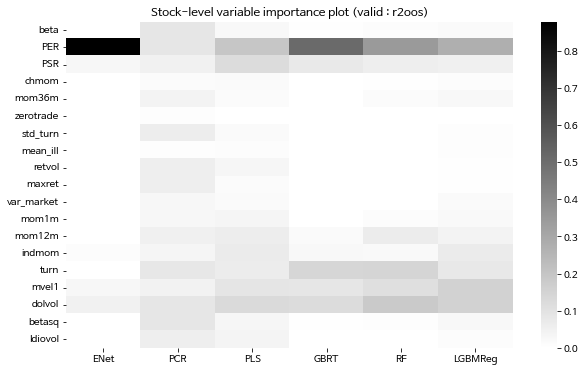

In [ ]:
# https://seong6496.tistory.com/252
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(temp, cmap='binary')
plt.title("Stock-level variable importance plot (valid : r2oos)")
plt.rc('figure', titlesize = 50) # figure title 폰트 크기

# IRR

In [ ]:
# GBRT
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_gbrt = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"GBRT_bayesian_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_gbrt.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [ ]:
# RF
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_rf = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path+"RF_bayesian_last3_"+str(i)+'.pkl')
    explainer = shap.TreeExplainer(temp)
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_rf.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

In [ ]:
# PLS
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pls = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PLS_irr"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))
    shap_pls.append(np.apply_along_axis(my_func, 1, abs(shap_values[0])[:, :19]))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# PCR
import shap
import pickle
import joblib

a = '2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020'

def my_func(x):
  return(x/np.sum(x))

shap_pcr = []
for i in range(9):
    X_train = X[ym.str.contains(a[:39+5*i])]
    y_train = y[ym.str.contains(a[:39+5*i])]
    X_test = X[ym.str.contains(a[40+5*i:44+5*i])]
    y_test = y[ym.str.contains(a[40+5*i:44+5*i])]
     
    temp = joblib.load(path2+"PCR_irr_"+str(i)+'.pkl')
    explainer = shap.KernelExplainer(temp.predict, shap.sample(X_train, 100, random_state=511))
    shap_values = explainer.shap_values(shap.sample(X_train, 100, random_state=511))[:, :19]
    shap_pcr.append(np.apply_along_axis(my_func, 1, abs(shap_values)))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
temp = pd.DataFrame({'PCR' : np.mean(np.mean(shap_pcr, axis=0), axis=0).tolist(),
                     'PLS' : np.mean(np.mean(shap_pls, axis=0), axis=0).tolist(),
                     'GBRT' : np.mean(np.mean(shap_gbrt, axis=0), axis=0).tolist(),
                     'RF' : np.mean(np.mean(shap_rf, axis=0), axis=0).tolist()}, index = X_train.columns[:19], dtype = float)
temp.head()

,PCR,PLS,GBRT,RF
"베타 (D,1Yr)",0.067844,0.074791,0.010408,0.031863
PER(배),0.215864,0.187245,0.279023,0.350473
PSR(배),0.056909,0.031090,0.046748,0.062736
chmom,0.017886,0.007278,0.005076,0.006479
mom36m,0.027764,0.040591,0.029903,0.017968


In [ ]:
np.sum(temp, axis=0)

PCR     1.0
PLS     1.0
GBRT    1.0
RF      1.0
dtype: float64

In [ ]:
temp.to_csv(path2+"micro_heatmap_CRP10.csv")

In [ ]:
temp["ENet"] = pd.read_csv(path2+"GLM_irr_sharpley.csv").transpose().values[:19]/np.sum(pd.read_csv(path2+"GLM_irr_sharpley.csv").transpose().values[:19])
temp["LGBM"]= pd.read_csv(path2+"LGBM_irr_sharpley.csv").transpose().values[:19]/np.sum(pd.read_csv(path2+"LGBM_irr_sharpley.csv").transpose().values[:19])
temp.head()

,PCR,PLS,GBRT,RF,ENet,LGBM
"베타 (D,1Yr)",0.067844,0.074791,0.010408,0.031863,0.013608,0.019047
PER(배),0.215864,0.187245,0.279023,0.350473,0.237657,0.258662
PSR(배),0.056909,0.031090,0.046748,0.062736,0.061562,0.043084
chmom,0.017886,0.007278,0.005076,0.006479,0.008062,0.010993
mom36m,0.027764,0.040591,0.029903,0.017968,0.023477,0.023273


In [ ]:
temp = temp.iloc[:, [4, 0, 1, 2, 3, 5]]
temp.head()

,ENet,PCR,PLS,GBRT,RF,LGBM
"베타 (D,1Yr)",0.013608,0.067844,0.074791,0.010408,0.031863,0.019047
PER(배),0.237657,0.215864,0.187245,0.279023,0.350473,0.258662
PSR(배),0.061562,0.056909,0.031090,0.046748,0.062736,0.043084
chmom,0.008062,0.017886,0.007278,0.005076,0.006479,0.010993
mom36m,0.023477,0.027764,0.040591,0.029903,0.017968,0.023273


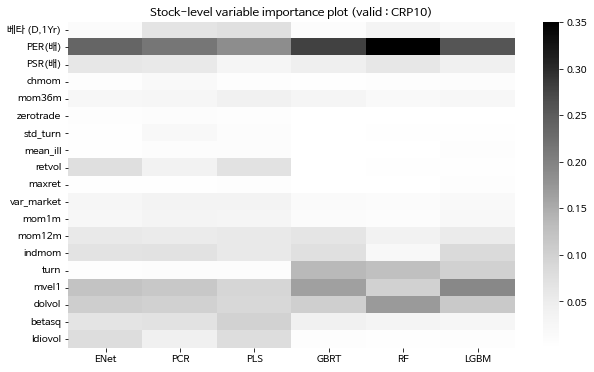

In [ ]:
# https://seong6496.tistory.com/252
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(temp, cmap='Greys')
plt.title("Stock-level variable importance plot (valid : CRP10)")
plt.rc('figure', titlesize = 70) # figure title 폰트 크기

In [ ]:
r2oos = pd.read_csv(path2+"micro_heatmap_r2oos.csv", index_col=0)
CRP10 = pd.read_csv(path2+"micro_heatmap_CRP10.csv", index_col=0)

In [ ]:
r2oos.rename({'베타 (D,1Yr)' : 'beta', 'PER(배)' : 'PER', 'PSR(배)' : 'PSR'}, axis='index', inplace=True)
r2oos.rename({'LGBM' : 'LGBMReg'}, axis=1, inplace=True)

CRP10.rename({'베타 (D,1Yr)' : 'beta', 'PER(배)' : 'PER', 'PSR(배)' : 'PSR'}, axis='index', inplace=True)
CRP10.rename({'LGBM' : 'LGBMReg'}, axis=1, inplace=True)

In [ ]:
r2oos["NN1"] = pd.read_csv(path2+"NNs_R2.csv")["NN1"].values/np.sum(pd.read_csv(path2+"NNs_R2.csv")["NN1"].values)
r2oos["NN2"] = pd.read_csv(path2+"NNs_R2.csv")["NN2"].values/np.sum(pd.read_csv(path2+"NNs_R2.csv")["NN2"].values)
r2oos["NN3"] = pd.read_csv(path2+"NNs_R2.csv")["NN3"].values/np.sum(pd.read_csv(path2+"NNs_R2.csv")["NN3"].values)
r2oos["NN4"] = pd.read_csv(path2+"NNs_R2.csv")["NN4"].values/np.sum(pd.read_csv(path2+"NNs_R2.csv")["NN4"].values)
r2oos["NN5"] = pd.read_csv(path2+"NNs_R2.csv")["NN5"].values/np.sum(pd.read_csv(path2+"NNs_R2.csv")["NN5"].values)

CRP10["NN1"] = pd.read_csv(path2+"NNs_IRR.csv")["NN1"].values/np.sum(pd.read_csv(path2+"NNs_IRR.csv")["NN1"].values)
CRP10["NN2"] = pd.read_csv(path2+"NNs_IRR.csv")["NN2"].values/np.sum(pd.read_csv(path2+"NNs_IRR.csv")["NN2"].values)
CRP10["NN3"] = pd.read_csv(path2+"NNs_IRR.csv")["NN3"].values/np.sum(pd.read_csv(path2+"NNs_IRR.csv")["NN3"].values)
CRP10["NN4"] = pd.read_csv(path2+"NNs_IRR.csv")["NN4"].values/np.sum(pd.read_csv(path2+"NNs_IRR.csv")["NN4"].values)
CRP10["NN5"] = pd.read_csv(path2+"NNs_IRR.csv")["NN5"].values/np.sum(pd.read_csv(path2+"NNs_IRR.csv")["NN5"].values)

In [ ]:
r2oos.to_csv(path2+"micro_heatmap_r2oos.csv")
CRP10.to_csv(path2+"micro_heatmap_CRP10.csv")

In [ ]:
rrank = pd.DataFrame(pd.read_csv(path2+"LGBMranker_irr_importance.csv", index_col=0).values[:19], index = r2oos.index)
rrank = rrank/np.sum(rrank)
rrank.rename({0 : 'LGBMRank'}, axis=1, inplace=True)
rrank

,LGBMRank
beta,0.017737
PER,0.175726
PSR,0.038421
chmom,0.022116
mom36m,0.049939
zerotrade,0.001854
std_turn,0.015610
mean_ill,0.016832
retvol,0.011412
maxret,0.021913


In [ ]:
ools = pd.DataFrame(pd.read_csv(path2+"ols_micro.csv").values, index = r2oos.index)
ools = ools/np.sum(ools)
ools.rename({0 : 'OLS'}, axis=1, inplace=True)
ools

,OLS
beta,0.020525
PER,0.275200
PSR,0.114917
chmom,0.018825
mom36m,0.009024
zerotrade,0.010201
std_turn,0.011296
mean_ill,0.010177
retvol,0.009536
maxret,0.008088


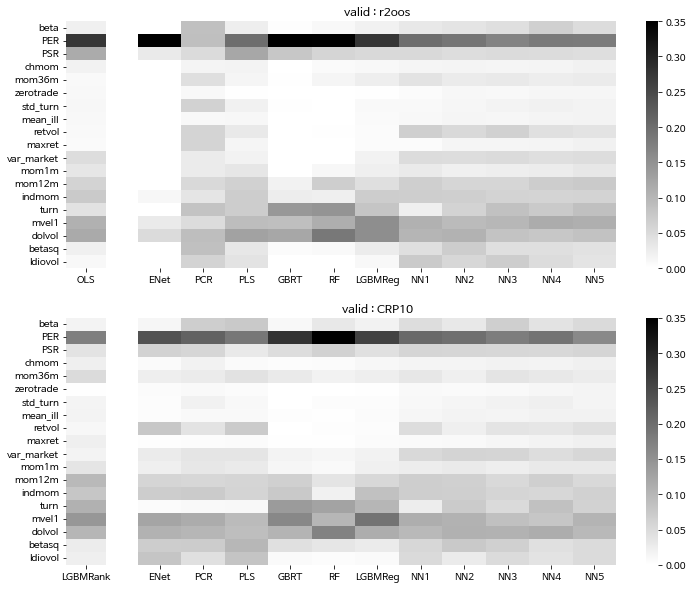

In [ ]:
import seaborn as sns
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 10))
gs = gridspec.GridSpec(nrows = 2, # row 몇 개 
                       ncols = 2, # col 몇 개
                       height_ratios = [10, 10], 
                       width_ratios = [1, 15]
                      )

fig.subplots_adjust(wspace = 0.1, hspace = 0.2)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])

sns.heatmap(ools, cmap="binary", vmin=0, vmax=0.35, cbar=False, ax=ax0)
# ax0.set_title("OLS")

sns.heatmap(r2oos, cmap="binary", vmin=0, vmax=0.35, ax=ax1)
ax1.set_title("valid : r2oos")
ax1.set_yticks([])

sns.heatmap(rrank, cmap="binary", vmin=0, vmax=0.35, cbar=False, ax=ax2)
# ax2.set_title("LGBMRank")

sns.heatmap(CRP10, cmap="binary", vmin=0, vmax=0.35, ax=ax3)
ax3.set_title("valid : CRP10")
ax3.set_yticks([])

# fig.suptitle("Stock-level variance importance plot", fontsize=15)
# plt.tight_layout()
plt.show()
fig.savefig(path+'image 모음/VIP_micro.png', bbox_inches='tight', pad_inches=0.1)

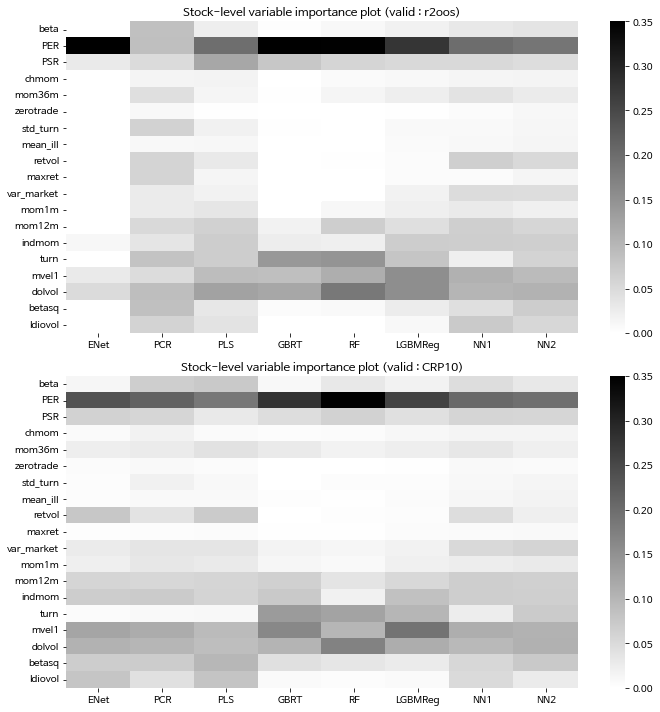

In [ ]:
# import seaborn as sns

# plt.figure(figsize=(10, 10))

# plt.subplot(2, 1, 1)
# sns.heatmap(r2oos, cmap="binary", vmin=0, vmax=0.35)
# plt.title("Stock-level variable importance plot (valid : r2oos)")
# plt.rc('figure', titlesize = 70) # figure title 폰트 크기

# plt.subplot(2, 1, 2)
# sns.heatmap(CRP10, cmap="binary", vmin=0, vmax=0.35)
# plt.title("Stock-level variable importance plot (valid : CRP10)")
# plt.rc('figure', titlesize = 70) # figure title 폰트 크기

# plt.tight_layout()
# plt.show()